In [1]:
import alphashape
import matplotlib.pyplot as plt
import numpy as np
import cv2

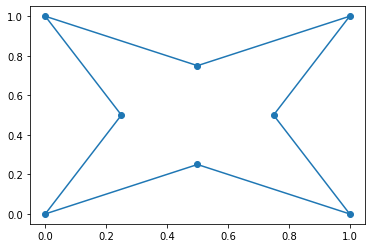

[(50.0, 25.0), (0.0, 0.0), (25.0, 50.0), (0.0, 100.0), (50.0, 75.0), (100.0, 100.0), (75.0, 50.0), (100.0, 0.0), (50.0, 25.0)]


In [5]:
# Define a set of 2D points
points_2d = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]
# points_2d = list([(x * 100, y * 100) for (x, y) in points_2d])
# print(points_2d)

def generate_alpha_shape(points_2d, alpha):
    # Generate the alphashape with an alpha value of 2.0
    alpha_shape = alphashape.alphashape(points_2d, alpha)
    if alpha_shape.is_empty:
        return []
    # Get the coordinates of the points that make up the alphashape
    alphashape_coords = alpha_shape.exterior.coords.xy

    # Plot the original set of points and the alphashape
    fig, ax = plt.subplots()
    ax.scatter(*zip(*points_2d))
    ax.plot(alphashape_coords[0], alphashape_coords[1])
    plt.show()

    # print(alphashape_coords)
    return [(x, y) for (x, y) in zip(alphashape_coords[0], alphashape_coords[1])]

def calculate_bounds(points):
    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = float('-inf'), float('-inf')

    for x, y in points:
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x)
        max_y = max(max_y, y)

    return [(min_x, min_y), (max_x, max_y)]

original_bounds = calculate_bounds(scaled_points)

def normalize_points(points, new_bounds=(0, 1)):
    # returns the normalized points as well as their original boundaries
    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = float('-inf'), float('-inf')

    for x, y in points:
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x)
        max_y = max(max_y, y)

    new_min, new_max = new_bounds
    return [((x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min,
             (y - min_y) / (max_y - min_y) * (new_max - new_min) + new_min) for x, y in points], ((min_x, min_y), (max_x, max_y))

def denormalize_points(points, original_bounds, new_bounds=(0, 1)):
    min_x, min_y = original_bounds[0]
    max_x, max_y = original_bounds[1]
    new_min, new_max = new_bounds
    return [((x - new_min) * (max_x - min_x) / (new_max - new_min) + min_x,
             (y - new_min) * (max_y - min_y) / (new_max - new_min) + min_y) for x, y in points]




# test it out
if __name__ == "__main__":

    scaled_points = [(x * 100, y * 100) for (x, y) in points_2d]
    normalized_points, original_bounds = normalize_points(scaled_points)
    alpha_shape_points = generate_alpha_shape(normalized_points, 2)
    denormalized_alpha_shape_points = denormalize_points(alpha_shape_points, original_bounds)

    print(denormalized_alpha_shape_points)
